In [ ]:
from sdofm.constants import ALL_WAVELENGTHS
import numpy as np

aia_image_dict = {}
idx = 0
for wavelength in ALL_WAVELENGTHS:
    # idx_row_element = self.aligndata.iloc[idx]
    idx_wavelength = 0  # idx_row_element[f"idx_{wavelength}"]
    # year = str(idx_row_element.name.year)
    i = (np.arange(512 * 512).reshape(512, 512),)
    aia_image_dict[wavelength] = np.array((i))  # , i, i))[:,0,:,:]
np.array(list(aia_image_dict.values())).shape

In [ ]:
from torch import Tensor

x = Tensor(np.array(list(aia_image_dict.values())))
# x.shape
x.view(x.size(0), -1).shape

In [ ]:
z = np.zeros((2, 9, 3, 512, 512))
print(z.shape)
z = Tensor(z)
z.flatten(2).transpose(1, 2).shape

In [2]:
d = {}
d["one"] = True
d.one

AttributeError: 'dict' object has no attribute 'one'

In [2]:
import torch

mask_ratio = 0.5
x = torch.rand(4, 10, 512 * 512)

In [3]:
"""
Perform per-sample random masking by per-sample shuffling.
Per-sample shuffling is done by argsort random noise.
x: [N, L, D], sequence
"""

N, L, D = x.shape  # batch, length, dim
len_keep = int(L * (1 - mask_ratio))

noise = torch.rand(N, L)  # noise in [0, 1]

# sort noise for each sample
ids_shuffle = torch.argsort(noise, dim=1)  # ascend: small is keep, large is remove
ids_restore = torch.argsort(ids_shuffle, dim=1)

# keep the first subset
ids_keep = ids_shuffle[:, :len_keep]
x_masked = torch.gather(x, dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D))

# generate the binary mask: 0 is keep, 1 is remove
mask = torch.ones([N, L], device=x.device)
mask[:, :len_keep] = 0
# unshuffle to get the binary mask
mask = torch.gather(mask, dim=1, index=ids_restore)

In [4]:
mask

tensor([[1., 1., 1., 0., 0., 0., 0., 1., 0., 1.],
        [1., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
        [1., 0., 1., 0., 0., 1., 0., 1., 1., 0.],
        [0., 1., 1., 0., 1., 0., 0., 1., 0., 1.]])

In [33]:
from sdofm.utils import get_1d_sincos_pos_embed_from_grid, get_3d_sincos_pos_embed
import numpy as np

embed_dim = 128
num_frames = 1
tubelet_size = 1
img_size = (512, 512)
patch_size = (16, 16)
grid_size = (
    num_frames // tubelet_size,
    img_size[0] // patch_size[0],
    img_size[1] // patch_size[1],
)

assert embed_dim % 16 == 0

t_size, h_size, w_size = grid_size

w_embed_dim = embed_dim // 16 * 6
h_embed_dim = embed_dim // 16 * 6
t_embed_dim = embed_dim // 16 * 4

w_pos_embed = get_1d_sincos_pos_embed_from_grid(
    w_embed_dim, np.arange(w_size) * mask_patch[15, :]
)
h_pos_embed = get_1d_sincos_pos_embed_from_grid(
    h_embed_dim, np.arange(h_size) * mask_patch[15, :]
)
t_pos_embed = get_1d_sincos_pos_embed_from_grid(t_embed_dim, np.arange(t_size))

w_pos_embed = np.tile(w_pos_embed, (t_size * h_size, 1))
h_pos_embed = np.tile(np.repeat(h_pos_embed, w_size, axis=0), (t_size, 1))
t_pos_embed = np.repeat(t_pos_embed, h_size * w_size, axis=0)

pos_embed = np.concatenate((w_pos_embed, h_pos_embed, t_pos_embed), axis=1)

In [13]:
t_size, h_size, w_size

(1, 32, 32)

In [43]:
w_embed_dim, h_embed_dim, t_embed_dim

(48, 48, 32)

In [39]:
get_1d_sincos_pos_embed_from_grid(
    w_embed_dim, np.arange(w_size) * mask_patch[15, :]
).shape

(32, 48)

In [42]:
128 // 16 * 6

48

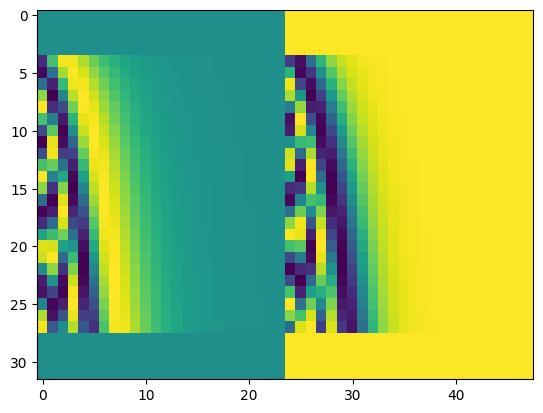

In [38]:
plt.imshow(
    get_1d_sincos_pos_embed_from_grid(
        w_embed_dim, np.arange(w_size) * mask_patch[15, :]
    ),
    aspect="auto",
)

In [3]:
import numpy as np

np.arange(32)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [29]:
np.arange(w_size) * mask_patch[15, :]

array([ 0.,  0.,  0.,  0.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27.,  0.,  0.,  0.,  0.])

In [10]:
w_embed_dim, h_embed_dim, t_embed_dim

(48, 48, 32)

In [9]:
w_pos_embed.shape

(3072, 48)

In [33]:
num_patches = grid_size[0] * grid_size[1] * grid_size[2]
pos_embed_zeros = torch.zeros(1, num_patches + 1, embed_dim)
pos_embed = get_3d_sincos_pos_embed(
    pos_embed_zeros.shape[-1], grid_size, cls_token=True
)

In [20]:
pos_embed.shape

(32, 96)

In [5]:
3072 / 3 / 16 / 16

4.0

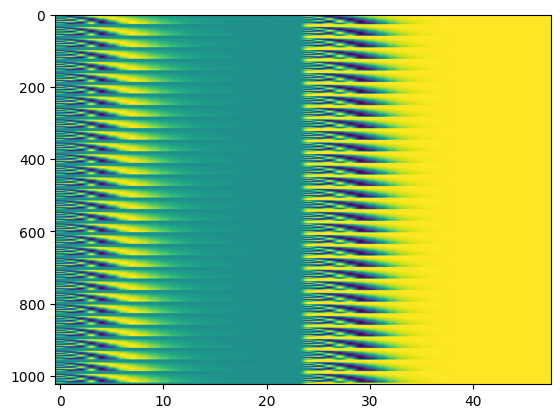

In [32]:
plt.imshow(w_pos_embed, aspect="auto")

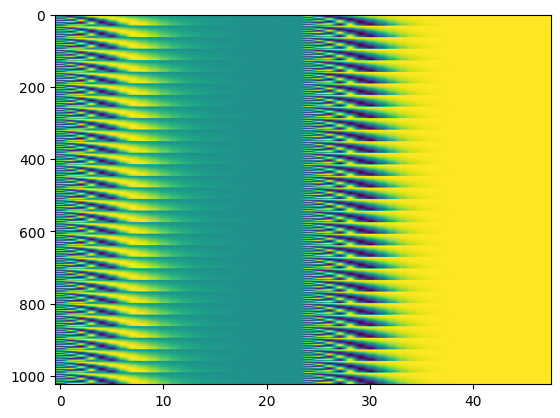

In [34]:
plt.imshow(w_pos_embed, aspect="auto")

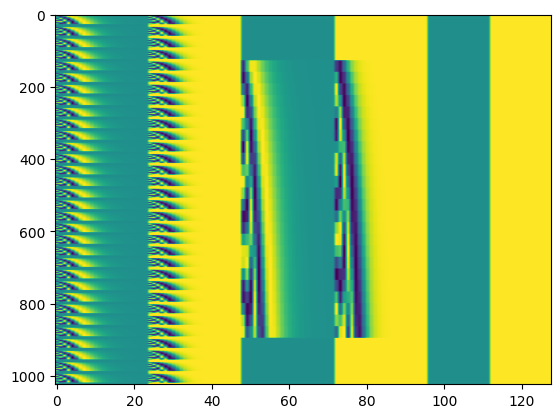

In [31]:
from matplotlib import pyplot as plt

plt.imshow(pos_embed, aspect="auto")

In [35]:
pos_embed = torch.from_numpy(pos_embed).float().unsqueeze(0)

In [38]:
pos_embed[:, 1:, :].shape

torch.Size([1, 3072, 1024])

In [41]:
pos_embed[:, :1, :]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.]]])

In [ ]:
patch_embedding + pos_embed[:, 1:, :]

In [53]:
((512 * 512) * 3)

9709.037037037036

In [50]:
1024 * 3

3072

In [60]:
x = torch.zeros((1, 1024, 3, 32, 32))
x.flatten(2).transpose(1, 2).shape

torch.Size([1, 3072, 1024])

In [59]:
512 * 512 * 3

786432

In [62]:
pos_embed.max()

tensor(1.)

In [21]:
mask = np.load("/mnt/sdoml/cache/hmi_mask_512x512.npy")

In [64]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [68]:
a = np.arange(512 * 512).reshape((512, 512))
a.shape

(512, 512)

In [26]:
rows, cols = mask.shape
mask_patch = np.floor(mask.reshape(rows // 16, 16, cols // 16, 16).mean(axis=(1, -1)))

In [22]:
b.shape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

Text(0.5, 1.0, '456 blocks of 16x16 pixels on SDOML 512x512')

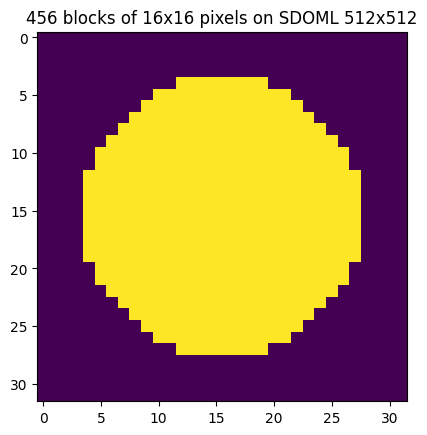

In [86]:
plt.imshow(np.floor(mask_patch))
plt.title("456 blocks of 16x16 pixels on SDOML 512x512")

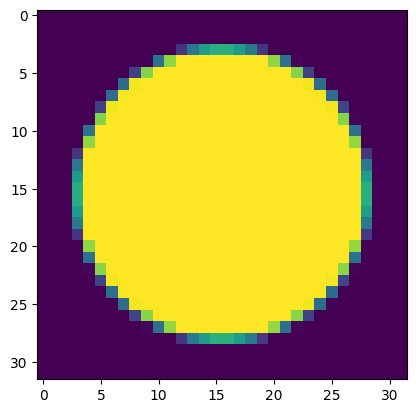

In [25]:
plt.imshow(mask_patch)

In [51]:
np.random.normal(15.73, 6.14) * 3

28.670850147899337

In [46]:
np.floor(mask_patch).shape

(32, 32)

In [48]:
idxs = np.where(np.floor(mask_patch) == 1.0)
patch_indices = idxs[0] * idxs[1]

In [50]:
patch_indices.shape

(456,)

In [94]:
torch.floor(
    torch.Tensor(
        mask.reshape(
            mask.shape[0] // patch_size[0],
            patch_size[0],
            mask.shape[1] // patch_size[0],
            patch_size[0],
        ).mean(axis=(1, -1))
    )
).to(dtype=torch.uint8)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8)

In [90]:
patch_size[0]

16

In [95]:
patch_embed = np.load("patch_embed.npy")

In [97]:
patch_embed.shape

(1, 3072, 128)

In [124]:
print(pos_embed.min(), pos_embed.max())

-0.9999902065507035 1.0


In [125]:
print(patch_embed[0, :, :].min(), patch_embed[0, :, :].max())

-47.26808 36.27511


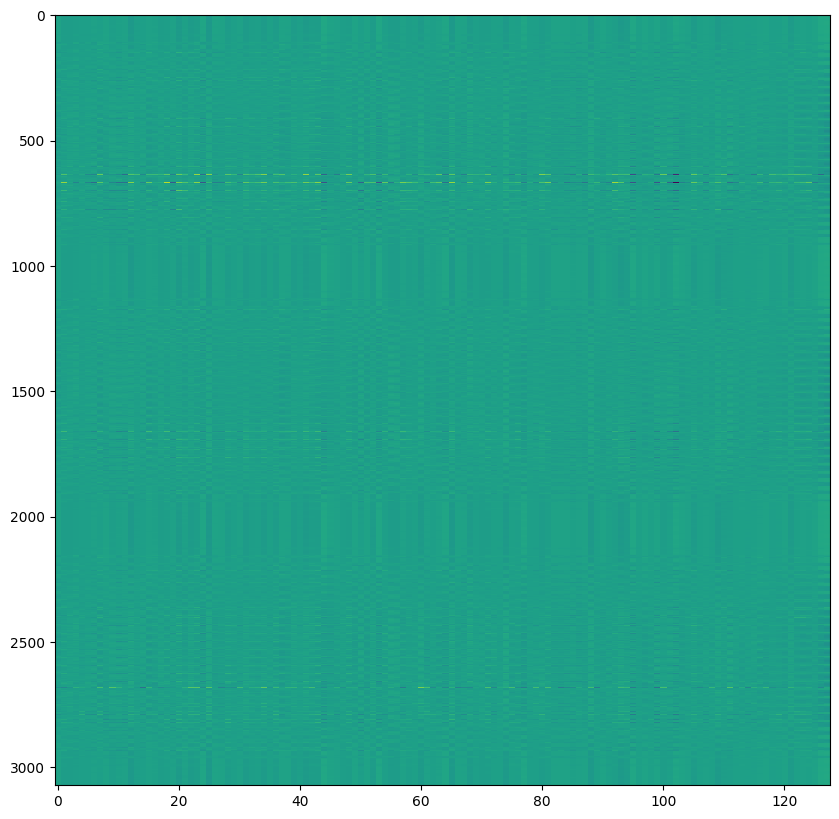

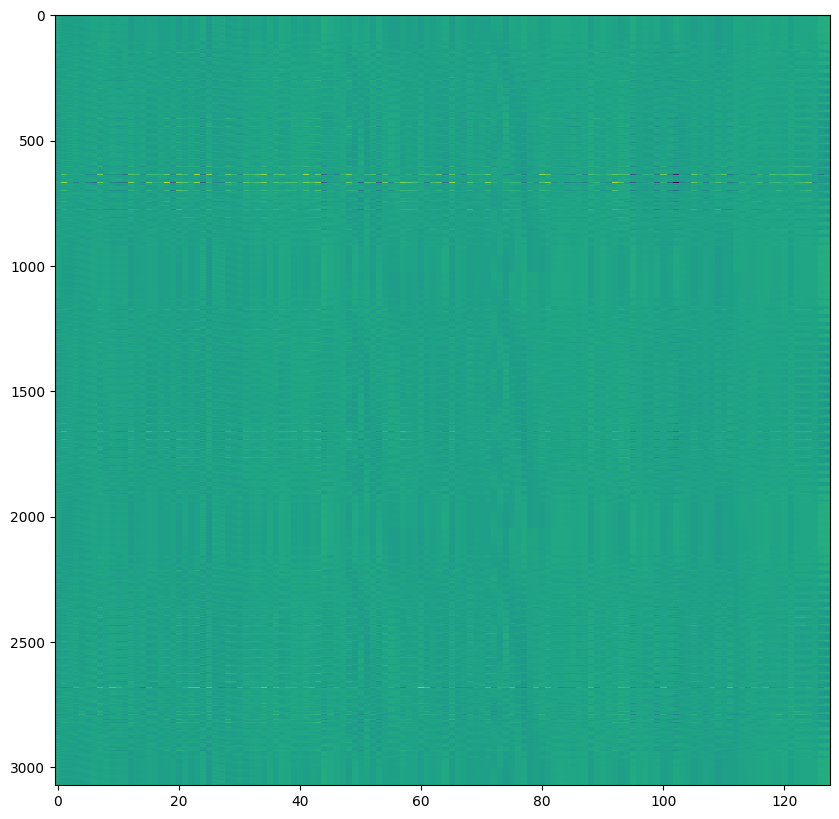

In [123]:
plt.rcParams["figure.figsize"] = (10, 10)
# plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(patch_embed[0, :, :], interpolation="nearest", aspect="auto")
plt.show()
plt.imshow(patch_embed[0, :, :] + pos_embed, interpolation="nearest", aspect="auto")

In [111]:
# plt.hist(patch_embed[0,:,:])
patch_embed.shape

(1, 3072, 128)

In [126]:
N, L, D = patch_embed.shape

In [127]:
L

3072

In [128]:
mask_ratio = 0.75
len_keep = int(L * (1 - mask_ratio))

768

In [131]:
noise = torch.rand(N, L)

In [132]:
noise.shape

torch.Size([1, 3072])

In [135]:
ids_shuffle = torch.argsort(noise, dim=1)
ids_restore = torch.argsort(ids_shuffle, dim=1)

In [142]:
# keep the first subset
ids_keep = ids_shuffle[:, :len_keep]
x_masked = torch.gather(
    torch.Tensor(patch_embed), dim=1, index=ids_keep.unsqueeze(-1).repeat(1, 1, D)
)

In [144]:
x_masked.shape

torch.Size([1, 768, 128])

In [146]:
# plt.imshow(x_masked[0, :, :], interpolation='nearest', aspect='auto')

In [147]:
mask = torch.ones([N, L], device=x.device)
mask[:, :len_keep] = 0
# unshuffle to get the binary mask
mask = torch.gather(mask, dim=1, index=ids_restore)

In [148]:
mask.shape

torch.Size([1, 3072])

In [10]:
import torch

N, L = 100, 100
hemispheres = torch.Tensor([-1, 1]).to(dtype=torch.int64)
random_hemisphere = torch.randint(0, 2, (N, L)).to(dtype=torch.int64)
# random_hemisphere[random_hemisphere == 0] = -1
random_hemisphere = hemispheres[random_hemisphere]

In [12]:
random_hemisphere

tensor([[ 1, -1,  1,  ..., -1, -1, -1],
        [ 1,  1,  1,  ...,  1, -1,  1],
        [-1,  1, -1,  ...,  1,  1, -1],
        ...,
        [-1,  1, -1,  ...,  1,  1,  1],
        [ 1, -1, -1,  ...,  1,  1, -1],
        [-1, -1,  1,  ...,  1, -1,  1]])